# Train a Classification Network with feedback after C3D features

In [5]:
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_on_training(txt, max_epochs=100, max_loss=5):
    loss = re.findall('- loss: \d+\.\d+', txt)
    accuracy = re.findall('- acc: \d+\.\d+', txt)
    val_loss = re.findall('- val_loss: \d+\.\d+', txt)
    val_accuracy = re.findall('- val_acc: \d+\.\d+', txt)

    loss = np.array([float(x[8:]) for x in loss], dtype=np.float32)
    accuracy = np.array([float(x[7:]) for x in accuracy], dtype=np.float32)
    val_loss = np.array([float(x[12:]) for x in val_loss], dtype=np.float32)
    val_accuracy = np.array([float(x[11:]) for x in val_accuracy], dtype=np.float32)
    
    t = np.arange(1, len(val_loss)+1).astype(np.int64)
    fig, ax1 = plt.subplots(figsize=(18, 10), dpi=100)
    ax1.plot(t, loss[392::393], 'b-')
    ax1.plot(t, val_loss, 'b-.')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss', color='b')
    ax1.set_xlim([0,max_epochs])
    ax1.set_ylim([0,max_loss])
    for tl in ax1.get_yticklabels():
        tl.set_color('b')

    ax2 = ax1.twinx()
    ax2.plot(t, accuracy[392::393], 'r-')
    ax2.plot(t, val_accuracy, 'r-.')
    ax2.set_ylabel('Accuracy', color='r')
    ax2.set_xlim([0,max_epochs])
    ax2.set_ylim([0, 1])
    for tl in ax2.get_yticklabels():
        tl.set_color('r')
    plt.show()

# Experiment 1

This network has been implemented a feedback from the previous output to achieve more flat and continuous outputs. It has 2 LSTM of 512, normalization after the features input and dropout before the first LSTM and after the last one. The lr has been choosen of `lr=1e-5` because the good results achieve in the previous network architecture.

```
nb_experiment: 1
batch_size: 256
timesteps: 20
epochs: 100
learning rate: 1e-05
____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
====================================================================================================
features (InputLayer)              (256, 20, 4096)     0                                            
____________________________________________________________________________________________________
normalization (BatchNormalization) (256, 20, 4096)     8192        features[0][0]                   
____________________________________________________________________________________________________
prev_output (InputLayer)           (256, 20, 202)      0                                            
____________________________________________________________________________________________________
merge_1 (Merge)                    (256, 20, 4298)     0           normalization[0][0]              
                                                                   prev_output[0][0]                
____________________________________________________________________________________________________
dropout_1 (Dropout)                (256, 20, 4298)     0           merge_1[0][0]                    
____________________________________________________________________________________________________
lstm1 (LSTM)                       (256, 20, 512)      9852928     dropout_1[0][0]                  
____________________________________________________________________________________________________
lstm2 (LSTM)                       (256, 20, 512)      2099200     lstm1[0][0]                      
____________________________________________________________________________________________________
dropout_2 (Dropout)                (256, 20, 512)      0           lstm2[0][0]                      
____________________________________________________________________________________________________
fc (TimeDistributed)               (256, 20, 201)      103113      dropout_2[0][0]                  
====================================================================================================
Total params: 12063433
____________________________________________________________________________________________________
```

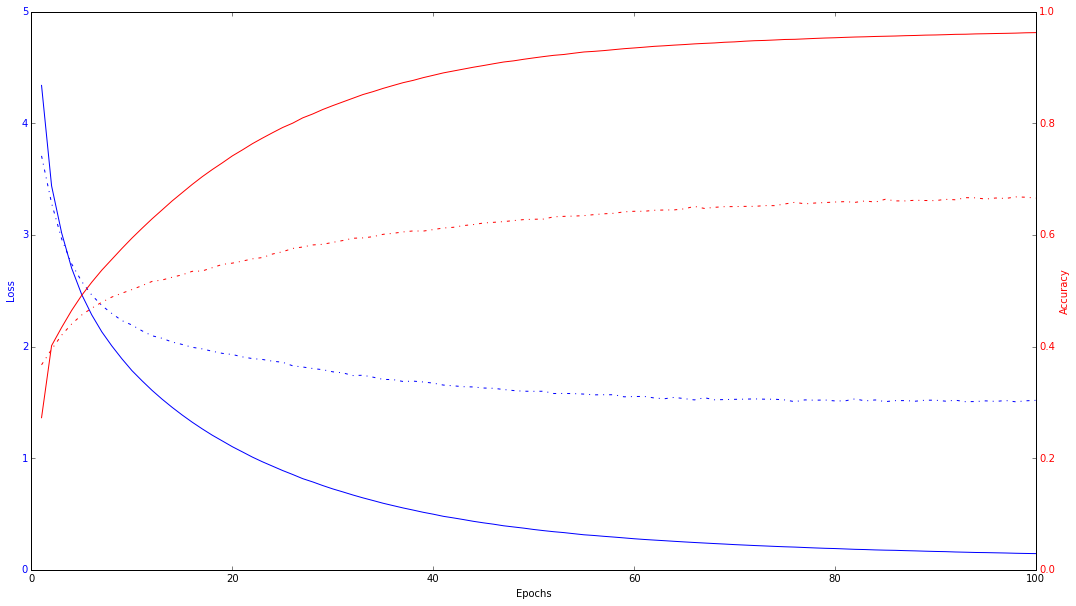

In [28]:
with open('../logs/training_e01.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt)

### Results
Epoch 60:
```
[INIT] Loaded annotations from validation subset.
	Number of ground truth instances: 4856
	Number of predictions: 14481
[RESULTS] Performance on ActivityNet untrimmed video classification task.
	Mean Average Precision: 0.507817407129
	Hit@3: 0.701794184368
	Avg Hit@3: 0.701484842236
```
Epoch 80:
```
[INIT] Loaded annotations from validation subset.
	Number of ground truth instances: 4856
	Number of predictions: 14481
[RESULTS] Performance on ActivityNet untrimmed video classification task.
	Mean Average Precision: 0.510896412153
	Hit@3: 0.70035058775
	Avg Hit@3: 0.700041245618
```

# Experiment 2

The same as in experiment 1 but with only 1 512-LSTM layer.

```
nb_experiment: 2
batch_size: 256
timesteps: 20
epochs: 100
learning rate: 1e-05
____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
====================================================================================================
features (InputLayer)              (256, 20, 4096)     0                                            
____________________________________________________________________________________________________
normalization (BatchNormalization) (256, 20, 4096)     8192        features[0][0]                   
____________________________________________________________________________________________________
prev_output (InputLayer)           (256, 20, 202)      0                                            
____________________________________________________________________________________________________
merge_1 (Merge)                    (256, 20, 4298)     0           normalization[0][0]              
                                                                   prev_output[0][0]                
____________________________________________________________________________________________________
dropout_1 (Dropout)                (256, 20, 4298)     0           merge_1[0][0]                    
____________________________________________________________________________________________________
lstm1 (LSTM)                       (256, 20, 512)      9852928     dropout_1[0][0]                  
____________________________________________________________________________________________________
dropout_2 (Dropout)                (256, 20, 512)      0           lstm1[0][0]                      
____________________________________________________________________________________________________
fc (TimeDistributed)               (256, 20, 201)      103113      dropout_2[0][0]                  
====================================================================================================
Total params: 9964233
____________________________________________________________________________________________________
```

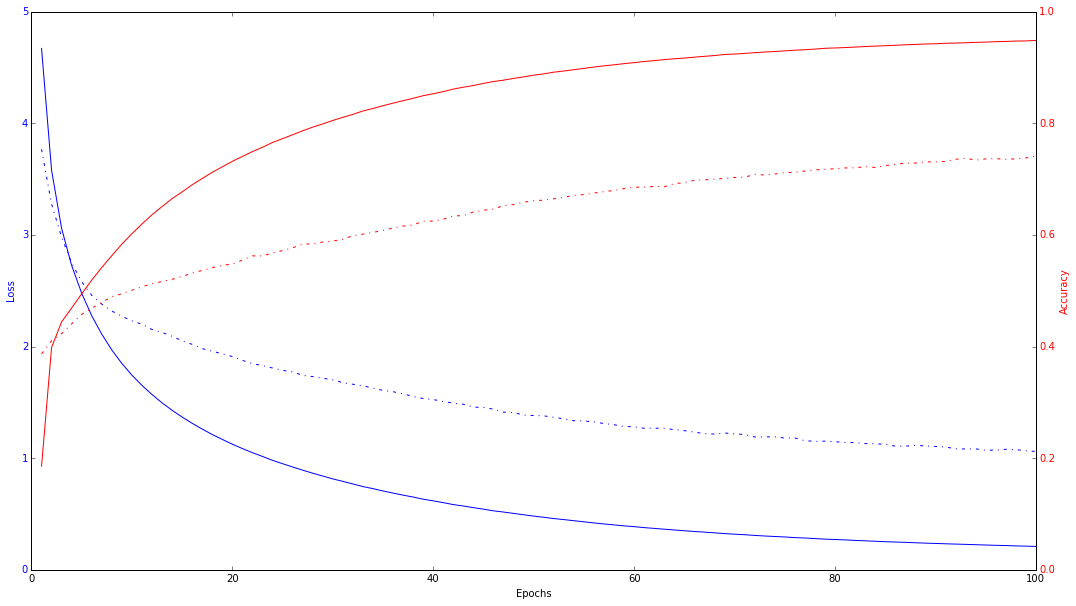

In [30]:
with open('../logs/training_e02.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt)

### Results
Epoch 100:
```
[INIT] Loaded annotations from validation subset.
	Number of ground truth instances: 4855
	Number of predictions: 14478
[RESULTS] Performance on ActivityNet untrimmed video classification task.
	Mean Average Precision: 0.521021764885
	Hit@3: 0.698226072607
	Avg Hit@3: 0.69801980198
```
```
[INIT] Loaded annotations from validation subset.
	Number of ground truth instances: 7516
	Number of predictions: 4335
	Fixed threshold for tiou score: 0.5
[RESULTS] Performance on ActivityNet detection task.
	Mean Average Precision: 0.0998640094583
```